<a href="https://colab.research.google.com/github/gabrielcerono/DiabetesColaboration/blob/main/Diabetes_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [4]:
data = pd.read_excel('/content/pone.0216416.s003.xlsx')

# Pre-Processing

In [5]:
data.head()

,no,"gender (male=1, female=0)",age,duration of diabetes,BMI,"insulin regimen (MDI=1, CSII=0)",TDD,TDD/kg,basal,basal/kg,bolus,bolus/kg,HbA1c,eGFR,%body fat,adiponectin,free-testosterone,SMI,grip strength,knee extension strength,gait speed,ucOC,OC
0,1,0,31,17,22.437670,0,43.700001,0.756055,6.336500,0.109628,37.363501,0.646427,6.3,82.927682,0.235501,14.3,0.8,6.9,30.299999,18.200001,0.81,19.10,49.6
1,2,1,31,25,25.556936,1,64.000000,0.820513,16.000000,0.205128,48.000000,0.615385,7.8,92.427345,0.323871,10.0,9.8,7.5,39.700001,25.200001,1.54,3.96,17.4
2,3,0,32,26,20.976562,0,27.400000,0.510242,10.549000,0.196443,16.851000,0.313799,5.8,84.945605,0.239700,16.1,1.1,6.1,18.400000,18.200001,1.20,2.01,10.8
3,4,0,25,17,21.297760,1,60.000000,1.169591,14.100000,0.274854,45.900000,0.894737,7.2,92.742008,0.200393,6.6,1.3,6.5,31.200001,17.799999,1.38,3.53,14.5
4,5,1,39,35,32.608940,0,60.950001,0.618782,21.332502,0.216574,39.617499,0.402208,7.6,108.602288,0.381244,13.8,10.0,8.3,42.099998,23.900000,1.28,2.46,12.2


The column 'no' is just an extra index, so we are going to drop it.

In [6]:
data = data.drop(['no'], axis=1)

In [7]:
data.shape

(73, 22)

Let's search for NaN values on our dataset.

In [8]:
data.isnull().values.any()

True

In [9]:
dfnan = data[data.isna().any(axis=1)]

In [10]:
dfnan.head(10)

,"gender (male=1, female=0)",age,duration of diabetes,BMI,"insulin regimen (MDI=1, CSII=0)",TDD,TDD/kg,basal,basal/kg,bolus,bolus/kg,HbA1c,eGFR,%body fat,adiponectin,free-testosterone,SMI,grip strength,knee extension strength,gait speed,ucOC,OC
5,0,37,25,22.631899,0,32.299999,0.566667,8.075000,0.141667,24.224999,0.425000,6.0,87.341658,NaN,17.0,2.3,NaN,28.299999,17.299999,1.28,0.55,6.4
45,0,35,21,21.415702,0,29.900000,0.508503,6.877000,0.116956,23.023000,0.391548,7.4,90.365191,0.242685,11.7,0.6,6.6,NaN,9.600000,1.37,12.60,31.6
71,1,36,29,24.483321,1,34.000000,0.468320,15.980000,0.220110,18.020000,0.248209,NaN,93.655404,0.193230,10.8,8.0,8.0,54.500000,29.200001,1.71,4.81,17.0
72,0,37,26,23.457858,0,35.200001,0.637681,16.544001,0.299710,18.655999,0.337971,5.6,94.068708,NaN,20.2,4.3,NaN,17.799999,13.600000,NaN,0.53,7.1


There are 4 rows with a few missing values, instead of droping the whole row I am going to fill with the average of each column


In [11]:
data = data.fillna(data.mean())
data.isnull().values.any()

False

Let's rename some of the columns for an easier time processing it

In [12]:
data.columns

Index(['gender (male=1, female=0)', 'age', 'duration of diabetes', 'BMI',
       'insulin regimen (MDI=1, CSII=0)', 'TDD', 'TDD/kg', 'basal', 'basal/kg',
       'bolus', 'bolus/kg', 'HbA1c', 'eGFR', '%body fat', 'adiponectin',
       'free-testosterone', 'SMI', 'grip strength', 'knee extension strength',
       'gait speed', 'ucOC', 'OC'],
      dtype='object')

In [13]:
data.columns = ['sex', 'age', 'duration_of_diabetes', 'BMI',
       'insulin_regimen', 'TDD', 'TDD/kg', 'basal', 'basal/kg',
       'bolus', 'bolus/kg', 'HbA1c', 'eGFR', 'bodyfat', 'adiponectin',
       'free-test', 'SMI', 'grip_strength', 'knee_extension_strength',
       'gait_speed', 'ucOC', 'OC']

# Plotting

In [14]:
import seaborn as sns

I believe age is going to be highly correlated with duration of the diabetes type 1, as is a disease that mostly presents in young populations

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


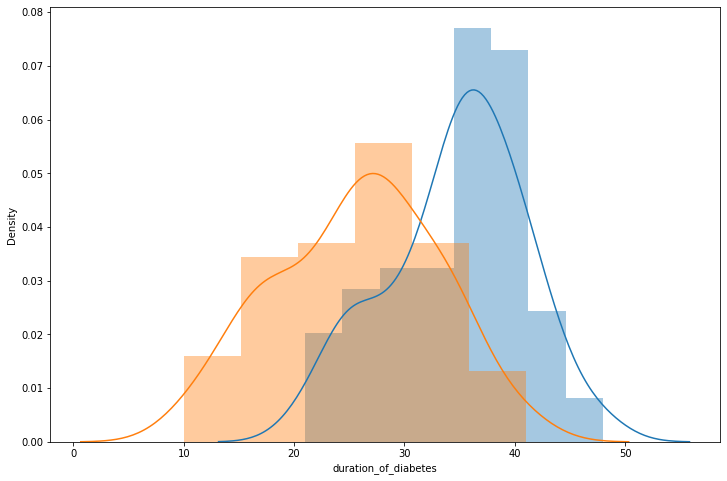

In [15]:
plt.figure(figsize=(12, 8))
sns.distplot(data['age'])
sns.distplot(data['duration_of_diabetes'])


Let's loop through the columns and let's look how the data is distributed

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


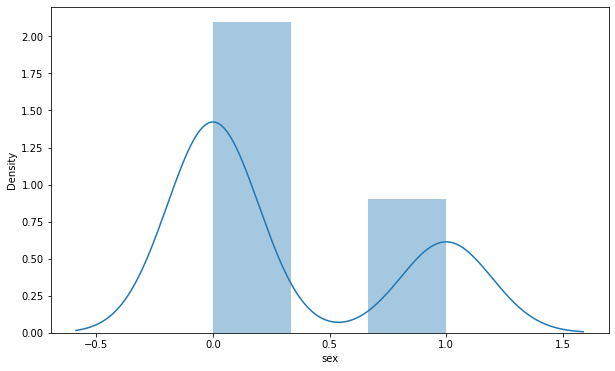

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


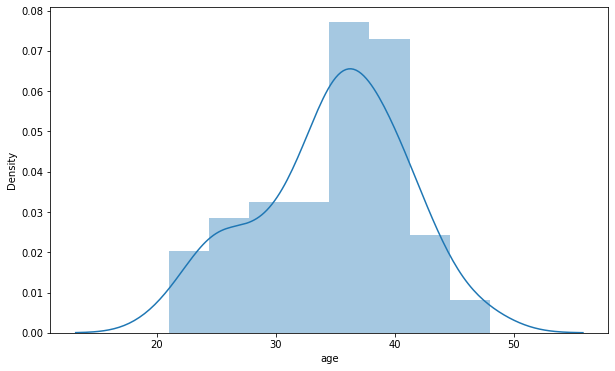

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


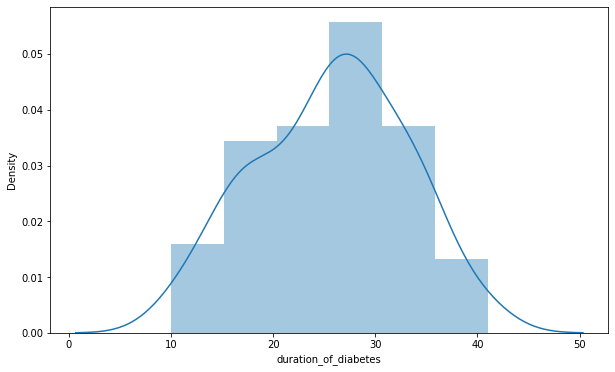

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


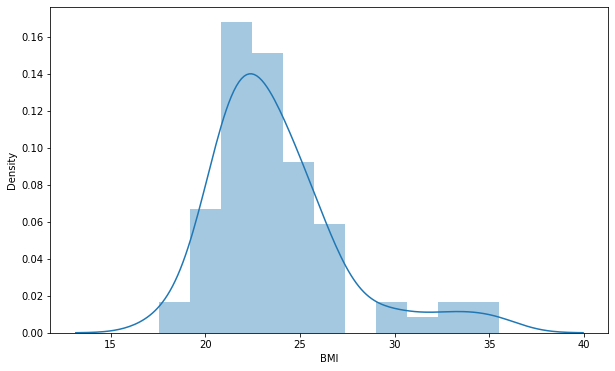

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


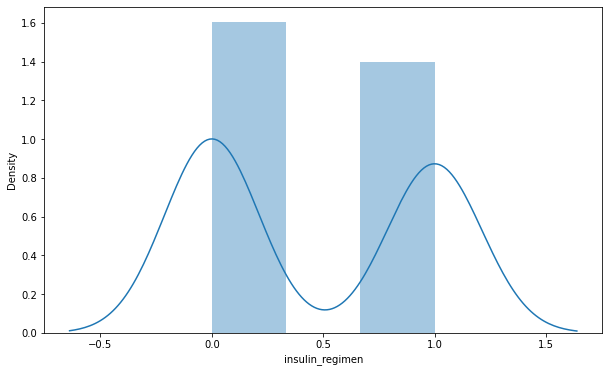

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


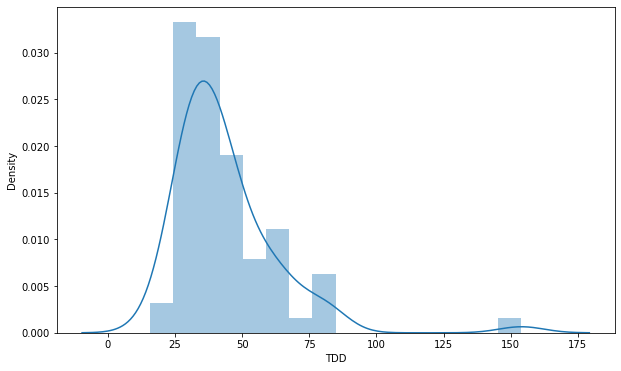

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


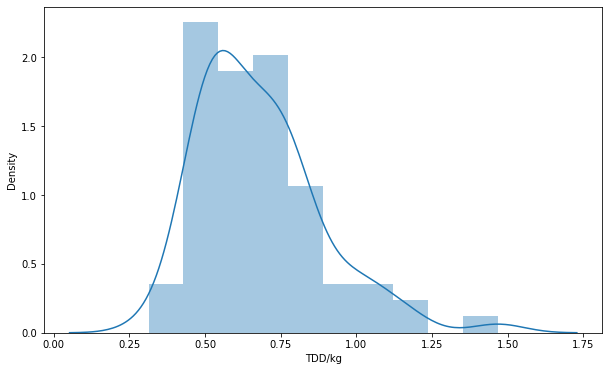

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


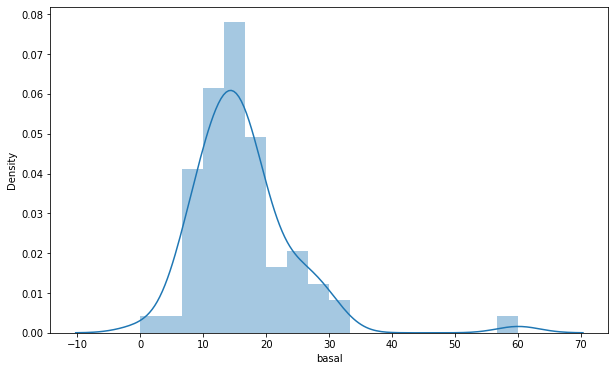

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


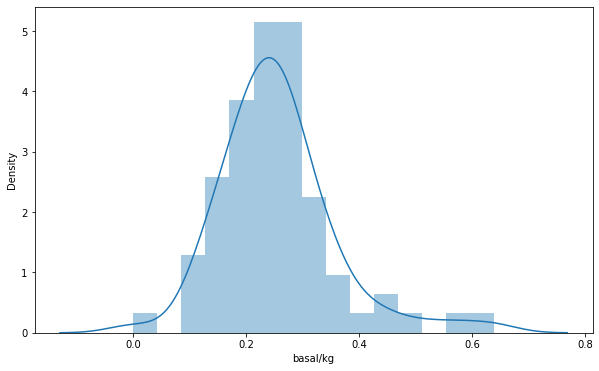

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


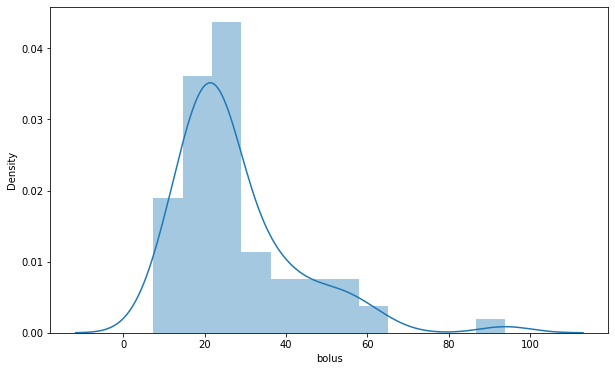

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


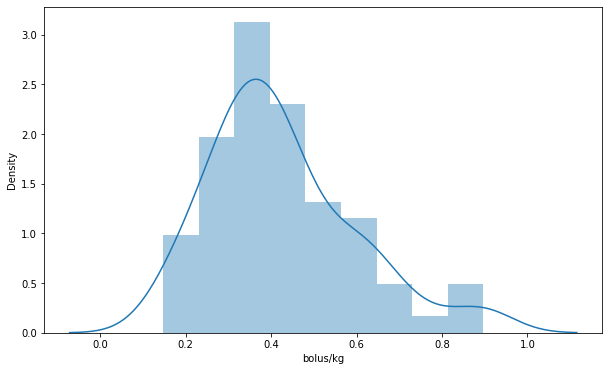

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


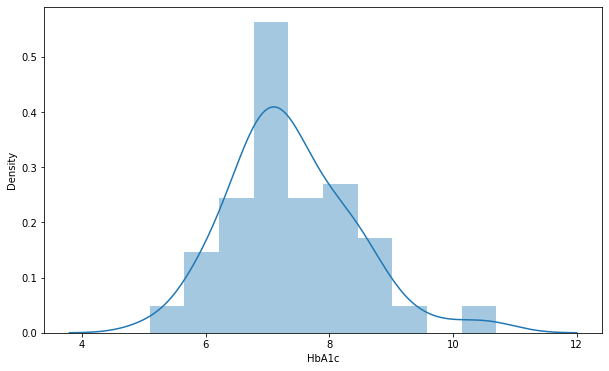

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


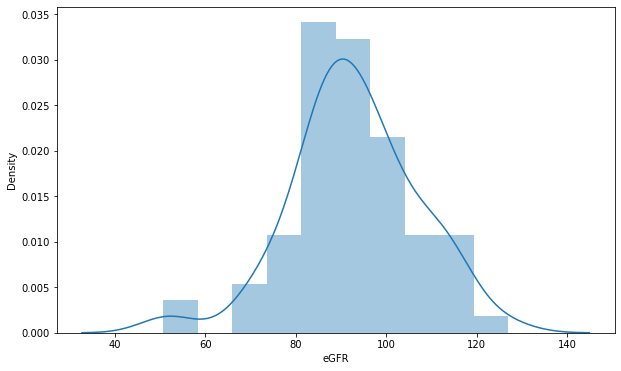

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


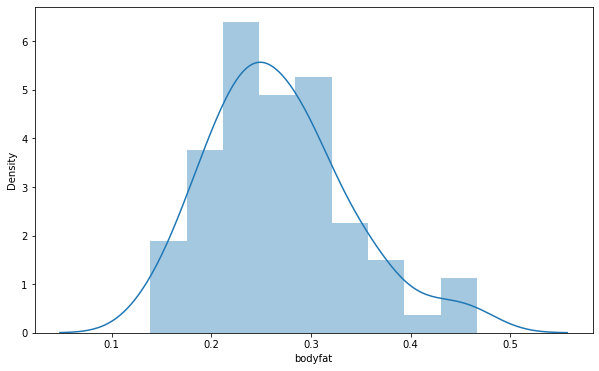

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


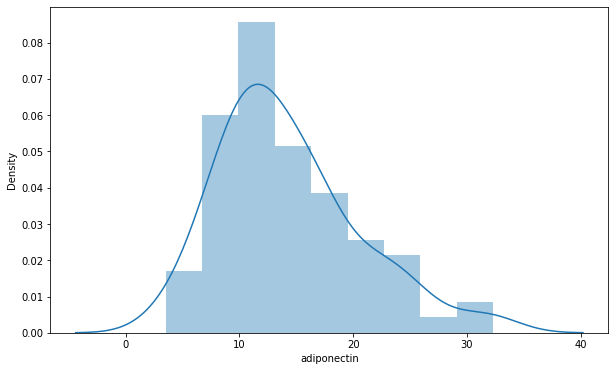

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


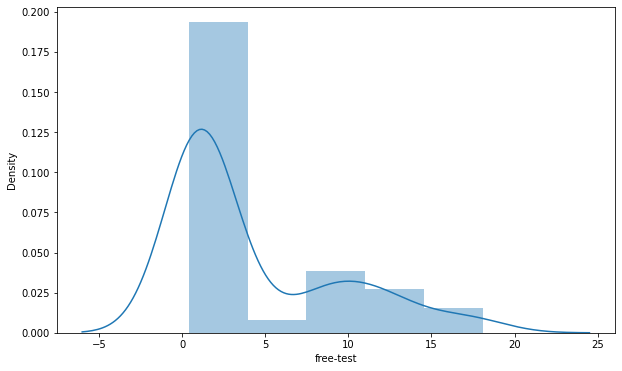

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


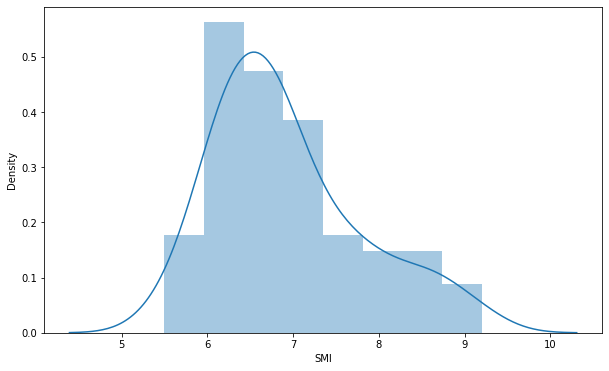

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


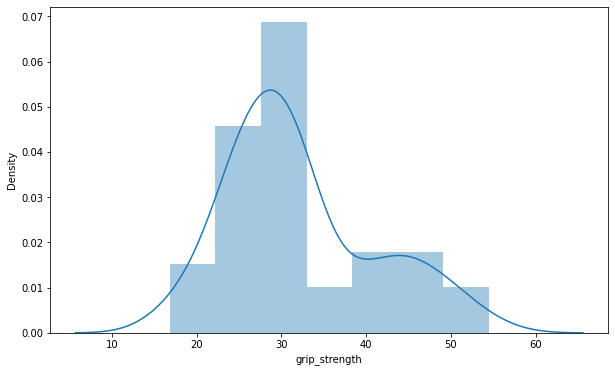

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


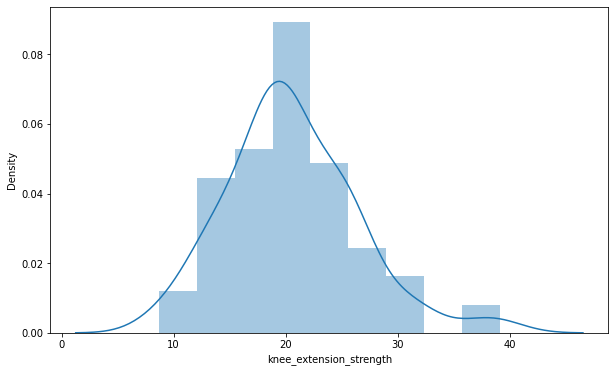

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


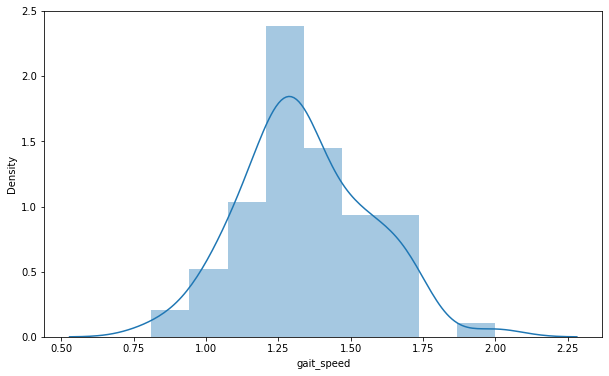

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


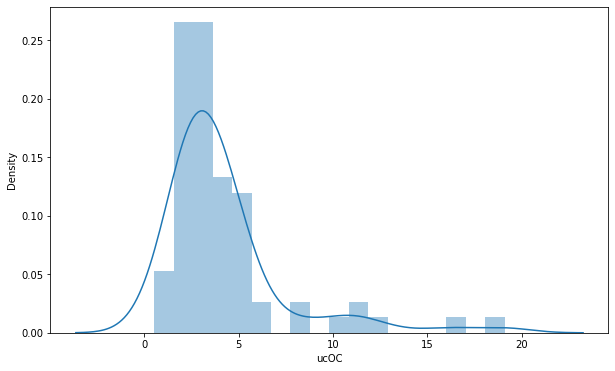

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


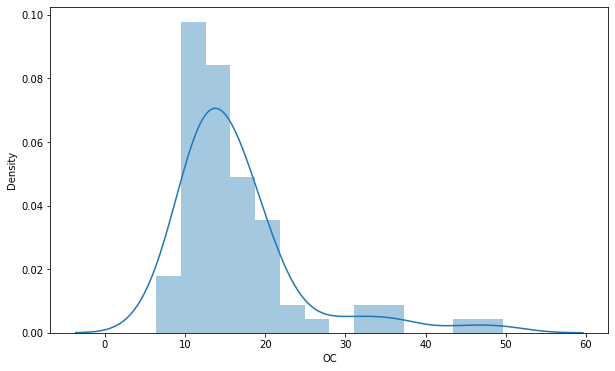

In [16]:
for i in data.columns:
    plt.figure(figsize=(10, 6))
    sns.distplot(data[i])
    plt.show()
    plt.close()

In [17]:
data.corr()

,sex,age,duration_of_diabetes,BMI,insulin_regimen,TDD,TDD/kg,basal,basal/kg,bolus,bolus/kg,HbA1c,eGFR,bodyfat,adiponectin,free-test,SMI,grip_strength,knee_extension_strength,gait_speed,ucOC,OC
sex,1.000000,0.146414,0.159551,0.304298,0.583730,0.509342,0.304679,0.318679,0.071316,0.503594,0.320411,-0.077958,0.204144,-0.293794,-0.307769,0.926533,0.794066,0.817132,0.609209,0.153165,-0.007539,0.027756
age,0.146414,1.000000,0.757926,0.086471,0.109060,-0.179238,-0.266439,-0.160990,-0.192165,-0.150821,-0.203069,-0.090503,-0.346239,-0.027509,0.088059,0.074747,0.181863,0.210468,0.172928,0.155752,-0.157385,-0.178085
duration_of_diabetes,0.159551,0.757926,1.000000,0.033943,0.104471,-0.241591,-0.349605,-0.194435,-0.213305,-0.215480,-0.289535,-0.022113,-0.291965,-0.053078,0.142900,0.170512,0.119039,0.171876,0.264489,0.369464,-0.174341,-0.175561
BMI,0.304298,0.086471,0.033943,1.000000,-0.090492,0.539420,0.168045,0.465295,0.076337,0.464279,0.154735,0.278989,0.108933,0.700158,-0.278430,0.252305,0.636611,0.280518,0.178437,0.117622,-0.183652,-0.176257
insulin_regimen,0.583730,0.109060,0.104471,-0.090492,1.000000,0.322503,0.373121,0.215324,0.179020,0.311545,0.337908,0.014883,0.112080,-0.367922,-0.115888,0.544940,0.287070,0.434554,0.368044,0.108579,0.048951,0.047582
TDD,0.509342,-0.179238,-0.241591,0.539420,0.322503,1.000000,0.869584,0.733927,0.438998,0.930218,0.774577,0.157266,0.209718,0.164172,-0.386311,0.480159,0.613250,0.433381,0.333048,-0.058876,-0.032065,-0.030433
TDD/kg,0.304679,-0.266439,-0.349605,0.168045,0.373121,0.869584,1.000000,0.618316,0.544776,0.819652,0.867013,0.131649,0.150260,-0.045279,-0.307059,0.297352,0.299075,0.219687,0.184706,-0.155708,0.061174,0.056520
basal,0.318679,-0.160990,-0.194435,0.465295,0.215324,0.733927,0.618316,1.000000,0.865771,0.433429,0.221799,0.194848,0.051221,0.200943,-0.326235,0.275674,0.401562,0.260981,0.224254,0.083722,-0.039900,-0.029661
basal/kg,0.071316,-0.192165,-0.213305,0.076337,0.179020,0.438998,0.544776,0.865771,1.000000,0.114651,0.054474,0.166407,-0.070002,-0.008954,-0.189893,0.052416,0.048792,0.005368,0.090267,0.080178,0.039993,0.052709
bolus,0.503594,-0.150821,-0.215480,0.464279,0.311545,0.930218,0.819652,0.433429,0.114651,1.000000,0.907850,0.103375,0.250573,0.109245,-0.336274,0.488110,0.596672,0.433985,0.320710,-0.123353,-0.020984,-0.024352


# Outliers


OC and auOC both look like they follow a LogNorm distribution. Let's check if the assumption is true


In [18]:
from scipy import stats

In [19]:
lognorm = np.log(data[['OC', 'ucOC']])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


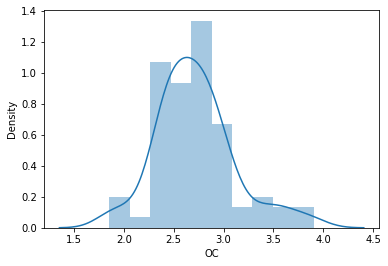

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


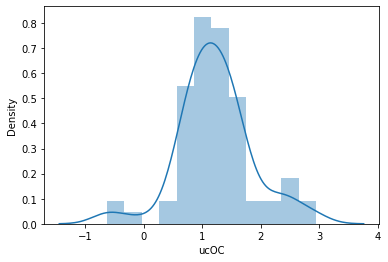

In [20]:
for x in lognorm.columns:
    sns.distplot(lognorm[x])
    plt.show()
    plt.close()

In [21]:
stats.normaltest(lognorm['ucOC'])

NormaltestResult(statistic=5.216622867562948, pvalue=0.07365881660148074)

In [22]:
stats.normaltest(lognorm['OC'])

NormaltestResult(statistic=9.447723714909383, pvalue=0.008880815794438206)

Let's look for outliers. We can use the Z score, and define any variable outside of the +-3Z range, to be an outlier. The only problem is that Z score is a parametric test and have the assumption of normal distribution. 
Let's run the Z test on all the columns except for OC and auOC

In [23]:
from scipy import stats

In [24]:
data1 = data[data.columns.difference(['OC', 'ucOC'])]

In [25]:
data2 = data1[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

In [26]:
data2.shape

(68, 20)

In [27]:
data2.head()

,BMI,HbA1c,SMI,TDD,TDD/kg,adiponectin,age,basal,basal/kg,bodyfat,bolus,bolus/kg,duration_of_diabetes,eGFR,free-test,gait_speed,grip_strength,insulin_regimen,knee_extension_strength,sex
1,25.556936,7.8,7.500000,64.000000,0.820513,10.0,31,16.000000,0.205128,0.323871,48.000000,0.615385,25,92.427345,9.8,1.54,39.700001,1,25.200001,1
2,20.976562,5.8,6.100000,27.400000,0.510242,16.1,32,10.549000,0.196443,0.239700,16.851000,0.313799,26,84.945605,1.1,1.20,18.400000,0,18.200001,0
3,21.297760,7.2,6.500000,60.000000,1.169591,6.6,25,14.100000,0.274854,0.200393,45.900000,0.894737,17,92.742008,1.3,1.38,31.200001,1,17.799999,0
4,32.608940,7.6,8.300000,60.950001,0.618782,13.8,39,21.332502,0.216574,0.381244,39.617499,0.402208,35,108.602288,10.0,1.28,42.099998,0,23.900000,1
5,22.631899,6.0,6.930986,32.299999,0.566667,17.0,37,8.075000,0.141667,0.268179,24.224999,0.425000,25,87.341658,2.3,1.28,28.299999,0,17.299999,0


Now that outliers have been taken away, we can join the original dataframe again

In [28]:
logcolumns = data[['OC', 'ucOC']]

In [29]:
logcolumns.head()

,OC,ucOC
0,49.6,19.10
1,17.4,3.96
2,10.8,2.01
3,14.5,3.53
4,12.2,2.46


In [30]:
dataz = pd.concat([data2, logcolumns], axis= 1)

In [31]:
dataz = dataz.dropna()

# Random Forest Regressor

In [32]:
dataz.columns

Index(['BMI', 'HbA1c', 'SMI', 'TDD', 'TDD/kg', 'adiponectin', 'age', 'basal',
       'basal/kg', 'bodyfat', 'bolus', 'bolus/kg', 'duration_of_diabetes',
       'eGFR', 'free-test', 'gait_speed', 'grip_strength', 'insulin_regimen',
       'knee_extension_strength', 'sex', 'OC', 'ucOC'],
      dtype='object')

In [33]:
X = dataz.drop('duration_of_diabetes', axis = 1)

In [34]:
y = dataz['duration_of_diabetes']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [36]:
rfc=RandomForestRegressor()

Let's make a param grind search to look for the best parameters in our random forest

In [37]:
param_grid = { 
    'n_estimators': [100,200, 300, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10,11,12,13,14,15,16],
    'criterion' :['mse']
    
}

In [38]:
rf_diabetes = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, n_jobs=-1)
rf_diabetes.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [39]:
rf_diabetes.best_params_

{'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 100}

In [40]:
rf_diabetes2= RandomForestRegressor(n_estimators=100, criterion='mse', max_depth= 12, max_features= 'auto')

# Looping through 100 random forests



In [41]:
r2mean = []

In [42]:
for x in range(100):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
  rf_diabetes2.fit(X_train, y_train)
  r2 = rf_diabetes2.score(X_test, y_test)
  r2mean.append(r2)

The score of the random forest regressor is by default the r*2. I appended the r2 from each randomforest I looped through, to the list r2mean.

In [43]:
r2mean

[0.2768661679025427,
 0.23494899722918583,
 0.43915904288377894,
 0.40147869992345003,
 0.6782931825473214,
 0.28015390815615215,
 0.3613665712616825,
 0.39299160291271096,
 0.5318686577181208,
 0.545307644170598,
 0.5035249758187093,
 0.33669561669829207,
 0.09097529082528544,
 0.25957310944105194,
 0.6014717716942147,
 0.5655136940220057,
 0.13414724804760103,
 0.35965670802463634,
 0.49227453466414905,
 0.3671743698482858,
 0.3999128207556102,
 0.5205854098805646,
 0.3723520234850074,
 0.40603739780328674,
 0.49660905763952423,
 0.1931829172759555,
 0.5417361171366595,
 0.5588328206412826,
 0.4778570566578032,
 0.5968808935442498,
 0.6538305635393145,
 0.5536170072426281,
 0.5280108130596721,
 0.48313534593724844,
 0.38531085094231865,
 0.2660111294339369,
 0.5013041572106457,
 0.3954974130371237,
 0.4210601665034279,
 0.5879216031953723,
 0.43593190604498594,
 0.5255887964026025,
 0.38402501425584495,
 0.22292613065326616,
 -0.25139446450060143,
 0.5110261964141277,
 0.491311540391

In [44]:
np.mean(r2mean)

0.41944636040158884

# Feature Importance and Prediction visualization

In [45]:
pred = rf_diabetes2.predict(X_test)

In [46]:
predictions = zip(pred, y_test)


In [47]:
predictions = pd.DataFrame(predictions)
predictions.columns = ['predicted', 'actual']
predictions

,predicted,actual
0,31.73,31.0
1,31.28,31.0
2,28.22,35.0
3,16.82,12.0
4,34.80,33.0
5,26.73,34.0
6,22.47,25.0
7,16.32,25.0
8,27.63,25.0
9,17.12,22.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


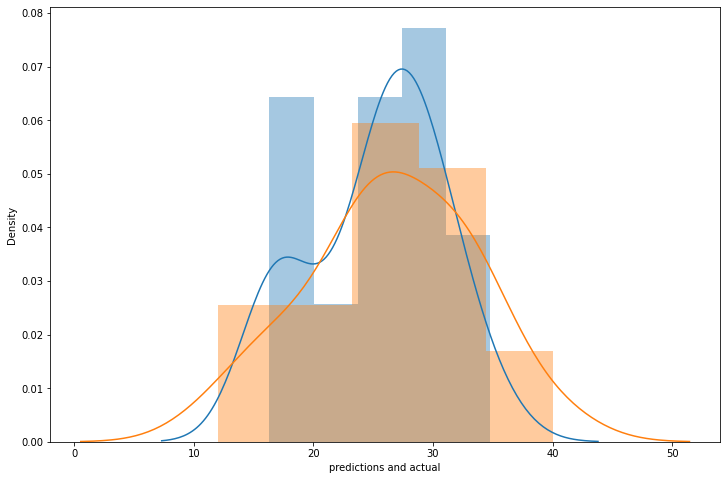

In [48]:
plt.figure(figsize=(12, 8))
sns.distplot(predictions['predicted'])
sns.distplot(predictions['actual'], axlabel= 'predictions and actual')

In [49]:
rf_diabetes2.feature_importances_

array([1.50037604e-02, 1.14907288e-02, 1.32667592e-02, 1.80181962e-02,
       3.28574127e-02, 1.68422861e-02, 6.74854310e-01, 1.12237801e-02,
       1.50213471e-02, 1.29548891e-02, 2.68267136e-02, 1.45102044e-02,
       2.83673280e-02, 2.74901989e-02, 2.72972713e-02, 1.06873242e-02,
       3.11200494e-04, 2.50172174e-02, 5.83682578e-04, 1.01186305e-02,
       7.25675868e-03])

In [50]:
features = zip(X.columns, rf_diabetes2.feature_importances_)

In [51]:
features1 = pd.DataFrame({'col_name': rf_diabetes2.feature_importances_}, index=X.columns).sort_values(by='col_name', ascending=False)

In [52]:
features1

,col_name
age,0.674854
TDD/kg,0.032857
eGFR,0.028367
free-test,0.027490
gait_speed,0.027297
bolus,0.026827
knee_extension_strength,0.025017
TDD,0.018018
adiponectin,0.016842
basal/kg,0.015021


# Discussion


It seems that total age is highly correlated with the duration of diabetes. Diabetes type 1 classically presents in children and adolescents, that must explain why age is so highly correlated with our target variable.
